In [ ]:
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets download -d sercandikici/merged-dataset-electricty-weather-for-modelling
#! unzip merged-dataset-electricty-weather-for-modelling.zip

Dataset URL: https://www.kaggle.com/datasets/sercandikici/merged-dataset-electricty-weather-for-modelling
License(s): unknown
  0% 0.00/104k [00:00<?, ?B/s]
100% 104k/104k [00:00<00:00, 54.1MB/s]
Archive:  merged-dataset-electricty-weather-for-modelling.zip
  inflating: merged_data.csv         


In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.2 MB/s et

In [ ]:
'''
Read the CSV file "merged_data.csv" into a DataFrame df.
Drop the column 'is_holiday' from the DataFrame df using the drop() function with axis=1.
Save the modified DataFrame df to a new CSV file named "merged_data_huggingface.csv" using the to_csv() function with index=False.
Download the CSV file "merged_data_huggingface.csv" using the files.download() function from the google.colab module.
'''

#df = pd.read_csv("merged_data.csv")
#df.drop('is_holiday', axis=1, inplace=True)
#df.to_csv('merged_data_huggingface.csv', index=False)
#from google.colab import files
#files.download('merged_data_huggingface.csv')

In [ ]:
'''
Use the files.upload() function to upload files from the local system.
'''

from google.colab import files
uploaded = files.upload()

Saving merged_data_huggingface.csv to merged_data_huggingface.csv


In [ ]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr

In [ ]:
def forecast_plot(forecast_days,test_days, days):
'''
Plot the forecasted values from forecast_days with a green line and label "Forecast".
Plot the actual values from test_days with orange points and label "Actual".
Set the x-axis label to "Date" and the y-axis label to "MGW".
Set the title of the plot using f-string formatting, including the model number and the days horizon.
Add a legend to the plot.
Return the figure object.
'''
  fig, ax = plt.subplots(figsize=(14, 4))
  ax.plot(forecast_days['ds'], forecast_days['yhat'], label='Forecast', color='green')
  ax.scatter(test_days['ds'], test_days['y'], label='Actual', color='orange')
  ax.set_xlabel('Date')
  ax.set_ylabel('MGW')
  plt.title(f'Prophet Forecast - Model 3 - {days} days horizon')
  plt.legend()

  return fig

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    '''Calculate and return the Mean Absolute Percentage Error (MAPE) between actual values (y_true) and predicted values (y_pred).'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    return mape

def root_mean_squared_error(y_true, y_pred):
    '''Calculate and return the Root Mean Squared Error (RMSE) between actual values (y_true) and predicted values (y_pred).'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

def r_squared(y_true, y_pred):
    '''Calculate and return the coefficient of determination (R-squared) value showing the proportion of variance in the dependent variable predictable from the independent variable.'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcz8mg4p7/wnn8mx7u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcz8mg4p7/9y38qc7h.json
10:01:08 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=59281', 'data', 'file=/tmp/tmpcz8mg4p7/wnn8mx7u.json', 'init=/tmp/tmpcz8mg4p7/9y38qc7h.json', 'output', 'file=/tmp/tmpcz8mg4p7/prophet_modele02gzu0h/prophet_model-20240513100108_2.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=59281', 'data', 'file=/tmp/tmpcz8mg4p7/wnn8mx7u.json', 'init=/tmp/tmpcz8mg4p7/9y38qc7h.json', 'output', 'file=/tmp/tmpcz8mg4p7/prophet_modele02gzu0h/prophet_model-20240513100108_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'enga

10:01:11 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=59281', 'data', 'file=/tmp/tmpcz8mg4p7/wnn8mx7u.json', 'init=/tmp/tmpcz8mg4p7/9y38qc7h.json', 'output', 'file=/tmp/tmpcz8mg4p7/prophet_modele02gzu0h/prophet_model-20240513100108_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpcz8mg4p7/prophet_modele02gzu0h/prophet_model-20240513100108_1.csv
 console_msgs (if any):
	/tmp/tmpcz8mg4p7/prophet_modele02gzu0h/prophet_model-20240513100108_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 25
    num_warmup = 25
    save_warmup = 0 (Default)
    thin = 1 (Default)


({'MAPE': 0.07, 'RMSE': 2262.4, 'R-squared': 0.718},
 <Figure size 1400x400 with 1 Axes>)

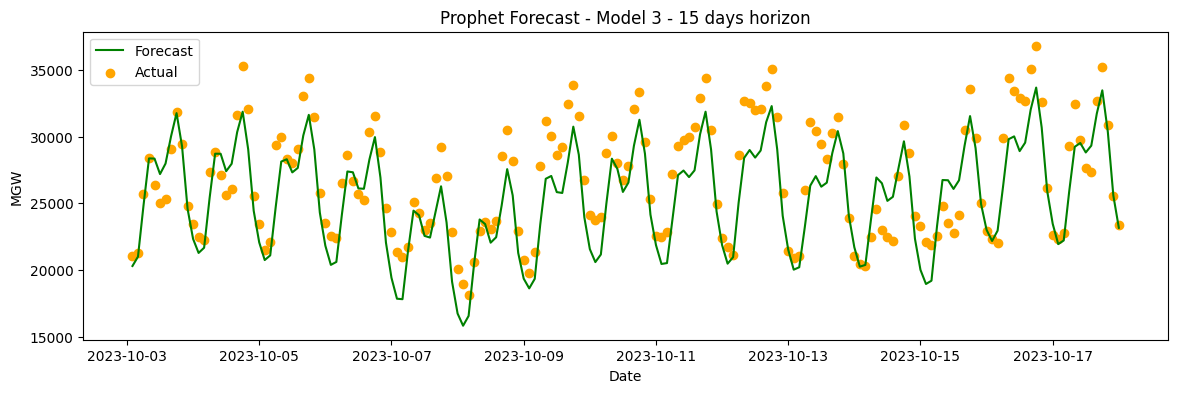

In [ ]:
def predict_and_evaluate(csv_file, days_to_predict,freq, country_name):
'''
The function predict_and_evaluate is designed to forecast electricity demand using the Prophet time series forecasting model and evaluate the forecast accuracy.

Parameters:
- csv_file: Path to the CSV file containing the historical electricity demand data with columns "ds" (datetime), "y" (target variable), and "temp" (temperature).
- days_to_predict: Number of days into the future to make predictions for.
- freq: Frequency of the time series data.
- country_name: Name of the country code for which the forecast is being made.

Steps:
1. Read the CSV file into a DataFrame and parse the datetime column.
2. Split the data into training and testing sets.
3. Set default values for frequency, days to predict, and country name.
4. Set parameters for the Prophet model including MCMC samples, changepoint prior scale, and seasonality prior scale.
5. Fit the Prophet model on the training data, adding country holidays and temperature as regressors.
6. Create a future DataFrame for prediction, setting regressors for both training and testing data.
7. Predict future values using the fitted model and calculate forecast metrics including MAPE, RMSE, and R-squared.
8. Plot the forecast using the forecast_plot function.
9. Return the forecast metrics and the plot.
'''
    df_model = pd.read_csv(csv_file)
    df_model.columns = ["ds", "y", "temp"]
    df_model['ds'] = pd.to_datetime(df_model['ds'])

    #Set parameters for the Prophet model
    split_from = 90 * 12
    train_data = df_model[:-split_from]
    test_data = df_model[-split_from:]
    freq = freq
    seasonality_prior_scale = 0.01
    changepoint_prior_scale = 0.05
    mcmc_samples = 50
    periods = days_to_predict * 12
    #Train and fit the Prophet model
    m = Prophet(mcmc_samples=mcmc_samples, changepoint_prior_scale=changepoint_prior_scale,
                seasonality_prior_scale=seasonality_prior_scale)
    m.add_country_holidays(country_name=country_name)
    m.add_regressor("temp", mode="additive")
    m.fit(train_data)
    #Create a future DataFrame for prediction, setting regressors for both training and testing data
    future = m.make_future_dataframe(periods=periods, freq=freq)
    train_idx = future["ds"].isin(train_data.ds)
    test_idx = ~train_idx

    reg = ["temp"]
    for r in reg:
        future.loc[train_idx, r] = train_data[r].to_list()
    for r in reg:
        future.loc[test_idx, r] = test_data.iloc[:periods][r].to_list()

    forecast = m.predict(future)
    forecast_days = forecast[forecast["ds"] >= test_data["ds"].iloc[0]]
    test_days = test_data[(test_data["ds"] >= test_data["ds"].iloc[0]) & (
                test_data["ds"] <= forecast_days["ds"].iloc[-1])]

    #Plot the forecast using the forecast_plot function
    plot = forecast_plot(forecast_days, test_days, days_to_predict)
    #Predict future values using the fitted model and calculate forecast metrics

    mape = mean_absolute_percentage_error(test_days["y"], forecast_days["yhat"])
    rmse = root_mean_squared_error(test_days["y"], forecast_days["yhat"])
    rsqr = r_squared(test_days["y"], forecast_days["yhat"])

    metrics = {
        "MAPE": round(mape,3),
        "RMSE": round(rmse,1),
        "R-squared": round(rsqr,3)
    }

    return metrics,plot

csv_name = "merged_data_huggingface.csv"

days_to_predict = 15  # Set the default value for days to predict
country_name = "UK" # Set the default value for country to predict
freq = "2H" # Set the default value for country to predict

predict_and_evaluate(csv_name, days_to_predict, freq, country_name)


In [ ]:
'''
This Gradio interface uses the `predict_and_evaluate` function to forecast electricity demand and evaluate the forecast accuracy.
Users can upload a CSV file containing historical electricity demand data, specify the number of days to predict,
and provide the data frequency and country code for holidays.

The interface displays evaluation metrics (MAPE, RMSE, R-squared) and a plot comparing forecasted values against actual values.

Example usage:
- Upload the file "merged_data_huggingface.csv"
- Set "Days to Predict" to 30
- Enter "2H" for data frequency
- Enter "UK" for the country code
'''

iface = gr.Interface(
    fn=predict_and_evaluate,
    inputs=[
        gr.File(label="CSV File"),
        gr.Slider(1, 90, value=30, step=1, label="Days to Predict"),
        gr.Textbox(label="Data Frequency", placeholder="Enter frequency (e.g., 2H for 2 hourly)"),
        gr.Textbox(label="Country Code", placeholder="Enter country code (e.g., UK)")
    ],
    outputs=[
        gr.Textbox(label=" Evaluation Metrics"),
        "plot"
    ],
    title="Prophet Electricty Load Forecasting Model",
    description="Upload a CSV file of time series data to generate electricty demand forecasts using Prophet. Update country code(eg UK or DE) for holidays and data frequency",
    examples=[
        ["merged_data_huggingface.csv", 30, "2H", "UK"]
        ]
)
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://369f63271a96195c31.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
